<a href="https://colab.research.google.com/github/shirkepranav98/Play-Store-App-Review-Analysis-/blob/main/Pranav_Shirke_Play_Store_App_Review_Analysis_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## Which free app is having highest installs and most number of reviews with rating greater than 4?

# Mounting the Drive and Loading the csv files





In [4]:
# # Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Import pandas 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Loading two csv files as path1 and path2
path1 = '/content/drive/MyDrive/AlmaBetter/Project on play store/csv files/'
path2 = '/content/drive/MyDrive/AlmaBetter/Project on play store/csv files/'

In [7]:
play_s_df = pd.read_csv(path1 + 'Play Store Data.csv')
user_r_df = pd.read_csv(path2 + 'User Reviews.csv')

# 1. INTRODUCTION TO DATA
---
Firstly let's get to know data. While I was analyzing the data, I used Pandas library.

1. info(): It informs about data columns and data types.
2. head(): It returns the first five data.
3. tail(): It returns the last five data.
4. columns : It returns data columns
5. describe : To get some basic statistical details
5. shape : It gives number of rows and columns in a tuble.

In [8]:
play_s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
play_s_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
play_s_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [11]:
play_s_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [12]:
play_s_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [13]:
play_s_df.shape

(10841, 13)

In [14]:
play_s_df.App.nunique()

9660

# Cleaning of Data
---



# **Remove** **Duplicates** -
### There is always a possibility that duplicates may exist within the dataframe and eliminating those duplicates is major task while analyzing the data. This can be done by drop_duplicates method.

In [15]:
# Firstly, Showing the existence of duplicates using app and counting the values of duplicate apps
duplicate =play_s_df.groupby(['App']).agg({'Category': 'count'}).reset_index()
duplicate = duplicate.sort_values(by=['Category'], ascending=False)
duplicate.head()

,App,Category
7302,ROBLOX,9
1934,"CBS Sports App - Scores, News, Stats & Watch Live",8
2364,Candy Crush Saga,7
3504,Duolingo: Learn Languages Free,7
101,8 Ball Pool,7


In [16]:
# Drop duplicates with a value in a specific column.
before = len(play_s_df.index)
print('Total entries with duplicates were '+ (str(before)))

play_s_df.drop_duplicates(subset ="App",keep = 'first', inplace = True)

after = len(play_s_df.index)
print('Total entries after duplicates were dropped are '+ (str(after)))
print('Total '+ (str(before-after))+' entries were dropped.')

Total entries with duplicates were 10841
Total entries after duplicates were dropped are 9660
Total 1181 entries were dropped.


In [17]:
# Shape of dataframe after removing duplicates
play_s_df.shape

(9660, 13)

#**Column: Rating**

In [18]:
# Changing the column names to one word
play_s_df.rename(columns={'Last Updated':'Last_Updated', 'Content Rating':'Content_Rating', 'Current Ver':'Current_Version', 'Android Ver':'Android_Version'}, inplace = True)

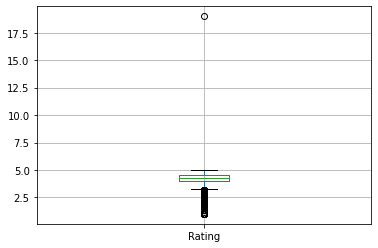

In [19]:
play_s_df.boxplot(column='Rating');

In [20]:
# Finding the sum of null values for each dataseries throughout the Dataframe
play_s_df.isnull().sum()

App                   0
Category              0
Rating             1463
Reviews               0
Size                  0
Installs              0
Type                  1
Price                 0
Content_Rating        1
Genres                0
Last_Updated          0
Current_Version       8
Android_Version       3
dtype: int64

In [21]:
# Checking the outliers 
play_s_df[play_s_df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [22]:
# Removing the outliers from column because it increases variability in our data.
play_s_df.drop([10472],inplace=True)

In [23]:
# Checking the dropped outliers with method of slicing
play_s_df[10471:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version


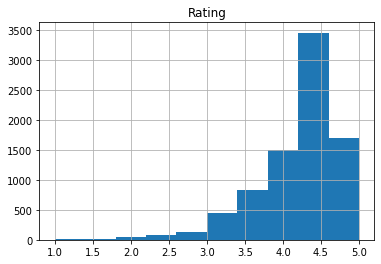

In [24]:
play_s_df.hist(column='Rating');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


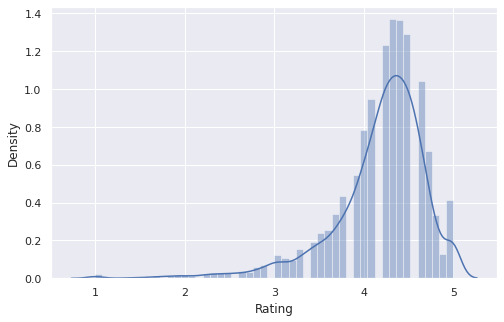

In [25]:
sns.set(rc={'figure.figsize':(8,5)});
sns.distplot(play_s_df.Rating);

In [26]:
''' Filling null values with median value because as we can see from the above distplot appeared as skewed to left. 
So the median is usually preferred in measures of central tendency when your data set is skewed '''

play_s_df['Rating'] = play_s_df['Rating'].fillna(play_s_df['Rating'].median())

In [27]:
# Counting the number of null values in Rating column
play_s_df.Rating.isnull().sum()

0

#**Column: Last_Updated**

In [28]:
# Converting datetime format for Last_Updated column
# Importing datetime modules
from datetime import datetime
from datetime import date

In [29]:
play_s_df['Last_Updated'] = pd.to_datetime(play_s_df['Last_Updated'],errors='coerce')

#**Column: Reviews**

In [30]:
#Checking null values
play_s_df.Reviews.isnull().sum()

0

In [31]:
# Converting the datatype of Reviews into numeric datatype
play_s_df['Reviews'] = pd.to_numeric(play_s_df['Reviews'])

In [32]:
# Checking the changed datatype of Reviews
play_s_df.Reviews.dtype

dtype('int64')

#**Column: Type**

In [33]:
# Checking the null values in Type Column
play_s_df['Type'].isnull().sum()

1

In [34]:
# Display the row which have null values in Type Column. Apart from Free and Paid Type, this column also has 1 NaN, which is display below:
play_s_df[play_s_df.Type.isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device


### Observation from above gives us that the only row with 0 Install and 0 Reviews, and also descript us that something wrong with this record. So, we opted to remove the row. 

In [35]:
# Removing the row from the data because there might be something wrong with this record and also it has undisturbed data in the row
play_s_df.drop([9148],inplace=True)

In [36]:
# Observing the dropped row with slicing
play_s_df[9145:9150]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
10317,LineStar for FanDuel,SPORTS,4.3,1539,14M,"50,000+",Free,0,Teen,Sports,2018-06-06,3.0.3,4.0.3 and up
10318,HD Video Download for Facebook,VIDEO_PLAYERS,4.4,20755,17M,"1,000,000+",Free,0,Everyone,Video Players & Editors,2018-03-16,4.0.3,4.1 and up
10319,Fire Emblem Heroes,FAMILY,4.6,407694,Varies with device,"5,000,000+",Free,0,Teen,Simulation,2018-07-19,2.7.1,4.2 and up
10320,Santa Fe FCU Mobile Banking,FINANCE,4.3,12,9.0M,"1,000+",Free,0,Everyone,Finance,2018-01-22,1.18.4,4.0 and up
10321,FE Connect,TOOLS,4.8,24,4.5M,"5,000+",Free,0,Everyone,Tools,2017-09-14,2.3.0,4.0.3 and up


In [37]:
# Checking the null values in Type Column
play_s_df.Type.isnull().sum()

0

#**Column: Size**

In [38]:
# Examining the Unique values
play_s_df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

### Amidst all the apps in this dataset, none has its size reach 1GB. All the values we have to parse either end with ‘M’ (Megabyte) or ‘k’ (kilobyte). So here we parsed the values in only MB(megabyte) as it is better way of representing the size in a dataset

In [39]:
# Expressly Transforming the Variable Size value into proper float value
play_s_df['Size'] = play_s_df.Size.apply(lambda x: str(x).replace("Varies with device",'NaN') if "Varies with device" in str(x) else x)
play_s_df['Size'] = play_s_df.Size.apply(lambda x: str(x).replace("M","") if "M" in str(x) else x)
play_s_df['Size'] = play_s_df.Size.apply(lambda x: float(str(x).replace("k",""))/1024 if "k" in str(x) else x)
play_s_df['Size'] = play_s_df['Size'].astype(float)
play_s_df['Size'] = play_s_df['Size'].fillna(play_s_df['Size'].mean())
play_s_df['Size'].dtype

dtype('float64')

#**Column: Installs**

In [40]:
# Checking unique values in Column
play_s_df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

### Data type of Installs is object. We make similar procedures, which constructed in the 'Size'.

In [41]:
# Now Transforming number of Installs into proper integer number 
play_s_df['Installs'] = play_s_df.Installs.apply(lambda x: str(x).replace("+","") if "+" in str(x) else x)
play_s_df['Installs'] = play_s_df.Installs.apply(lambda x: str(x).replace(",","") if "," in str(x) else x)
play_s_df['Installs'] = play_s_df.Installs.astype(int)
play_s_df['Installs'].dtype

dtype('int64')

# **Column: Price**

In [42]:
# Observing the unique values in Column
play_s_df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

### As we look out for unique values that will be like this lead: ‘0’ if it is free, else a '$' sign followed by a floating-point number. Datatype of Price is object. We can make similar code as in Installs to get appropriate dtype. 

In [43]:
play_s_df['Price'] = play_s_df['Price'].apply(lambda x: str(x).replace("$","") if "$" in str(x) else x)
play_s_df['Price'] = play_s_df['Price'].astype(float)
play_s_df['Price'].dtype

dtype('float64')

# **Column: Current_Version**

In [44]:
# Observing the null values in Current_Version Column
play_s_df.Current_Version.isnull().sum()

8

In [45]:
# Displaying NaN values which we have to fill with mode of Current_Version
play_s_df[play_s_df.Current_Version.isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.700000,5000,Free,0.00,Everyone,Art & Design,2018-06-06,NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,0.010742,1000000,Free,0.00,Everyone,Libraries & Demo,2013-02-12,NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.700000,500000,Free,0.00,Everyone,Tools,2017-05-10,NaN,4.0 and up
6803,BT Master,FAMILY,4.3,0,0.216797,100,Free,0.00,Everyone,Education,2016-11-06,NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14.000000,50000,Paid,0.99,Everyone,Puzzle,2018-04-18,NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.3,44,7.200000,10000,Free,0.00,Everyone,Entertainment,2017-04-03,NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.3,1,0.231445,10,Paid,0.99,Everyone,Tools,2016-07-04,NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8,0.642578,1000,Free,0.00,Everyone,Books & Reference,2017-01-31,NaN,3.0 and up


In [46]:
# # Filling NaN values with mode of Current_Version
play_s_df['Current_Version'].fillna(str(play_s_df['Current_Version'].mode().values[0]), inplace=True)

# **Column: Android_Version**

In [47]:
# Observing the null values in Android_Version Column
play_s_df.Android_Version.isnull().sum()

2

In [48]:
# Displaying NaN values which we have to fill with mode of Current_Version
play_s_df[play_s_df.Android_Version.isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11.0,1000,Paid,1.49,Everyone,Personalization,2018-07-20,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1,10000,Free,0.00,Everyone,Personalization,2018-03-27,1.1,NaN


In [49]:
# # Filling NaN values with mode of Android_Version and replacing 'and up' with empty quotes
play_s_df['Android_Version'].fillna(str(play_s_df['Android_Version'].mode().values[0]), inplace=True)
play_s_df['Android_Version'] = play_s_df['Android_Version'].replace({' and up':''}, regex=True)

In [50]:
play_s_df.isnull().sum()

App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content_Rating     0
Genres             0
Last_Updated       0
Current_Version    0
Android_Version    0
dtype: int64

# **Merging two dataset**
## While functioning with CSV files during data analysis, there are two files named as User Reviews and Play Store Data in which we have to commit the data visualization. For that there’s a need to merge these two files into a single data frame. Favorably, the Pandas library contribute us with various methods such as merge, concat, and join to make this feasible. 



In [51]:
# Defining variable to two merged dataset as merged_df
merged_df = play_s_df.merge(user_r_df, on='App')

In [52]:
merged_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,I love colors inspyering,Positive,0.500,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,I hate,Negative,-0.800,0.900000
6,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,NaN,NaN,NaN,NaN
7,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,omgggggg,Neutral,0.000,0.000000
8,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,It cute.,Positive,0.500,1.000000
9,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,I love,Positive,0.500,0.600000


In [53]:
# Checking the null values in merged dataset
merged_df.isnull().sum()

App                           0
Category                      0
Rating                        0
Reviews                       0
Size                          0
Installs                      0
Type                          0
Price                         0
Content_Rating                0
Genres                        0
Last_Updated                  0
Current_Version               0
Android_Version               0
Translated_Review         25627
Sentiment                 25622
Sentiment_Polarity        25622
Sentiment_Subjectivity    25622
dtype: int64

In [54]:
# Eliminating the null values as this affect the performance and accuracy of our data analysis. 
merged_df.dropna(inplace=True)

In [55]:
# Acquiring details for merged dataset after removing all null values
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35929 entries, 0 to 61555
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     35929 non-null  object        
 1   Category                35929 non-null  object        
 2   Rating                  35929 non-null  float64       
 3   Reviews                 35929 non-null  int64         
 4   Size                    35929 non-null  float64       
 5   Installs                35929 non-null  int64         
 6   Type                    35929 non-null  object        
 7   Price                   35929 non-null  float64       
 8   Content_Rating          35929 non-null  object        
 9   Genres                  35929 non-null  object        
 10  Last_Updated            35929 non-null  datetime64[ns]
 11  Current_Version         35929 non-null  object        
 12  Android_Version         35929 non-null  object

# Exploratory Analysis and Visualization

In [56]:
# 
merged_df.describe()

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
count,35929.000000,3.592900e+04,35929.000000,3.592900e+04,35929.000000,35929.000000,35929.000000
mean,4.297197,1.413699e+06,26.402307,4.377751e+07,0.109197,0.180904,0.493767
std,0.303176,5.733496e+06,21.852403,1.453414e+08,1.302471,0.350080,0.258053
min,2.600000,1.140000e+02,0.008301,1.000000e+03,0.000000,-1.000000,0.000000
25%,4.100000,1.024700e+04,13.000000,1.000000e+06,0.000000,0.000000,0.361111
50%,4.300000,6.451300e+04,20.394897,5.000000e+06,0.000000,0.150000,0.514835
75%,4.500000,5.156570e+05,28.000000,1.000000e+07,0.000000,0.400000,0.650000
max,4.900000,7.815831e+07,99.000000,1.000000e+09,29.990000,1.000000,1.000000


#### Let we find correlation between columns in a dataframe. Correlation map is used to detect the pairwise correlation between all quantitative measurables in a dataset. 

In [57]:
merged_df.corr()

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.075736,0.116678,0.020145,-0.010055,0.092903,0.068758
Reviews,0.075736,1.000000,0.214605,0.564256,-0.020591,-0.080021,-0.009315
Size,0.116678,0.214605,1.000000,0.075029,-0.008023,-0.126930,0.010901
Installs,0.020145,0.564256,0.075029,1.000000,-0.025213,-0.057842,-0.006307
Price,-0.010055,-0.020591,-0.008023,-0.025213,1.000000,0.024148,0.003182
Sentiment_Polarity,0.092903,-0.080021,-0.126930,-0.057842,0.024148,1.000000,0.259668
Sentiment_Subjectivity,0.068758,-0.009315,0.010901,-0.006307,0.003182,0.259668,1.000000


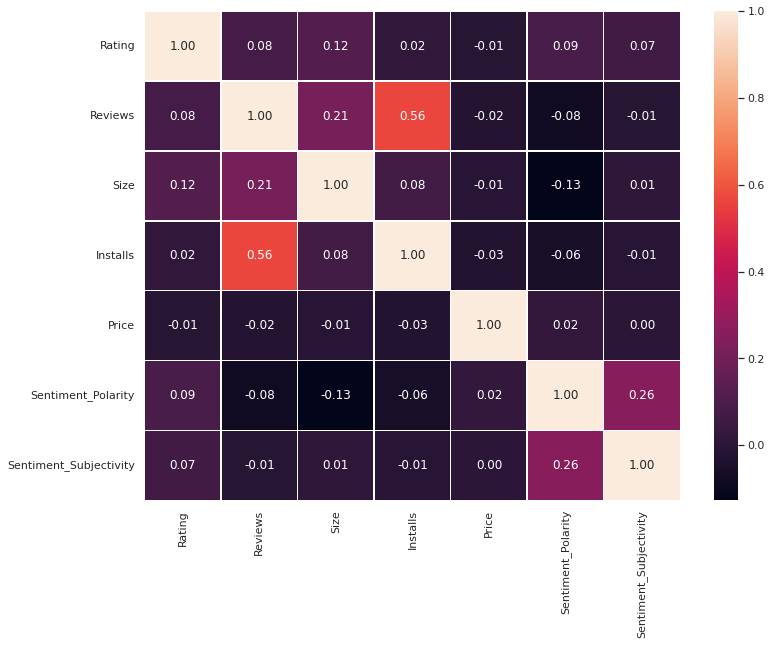

In [58]:
# Correlation map
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(merged_df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

In [80]:
cat_merged_df=merged_df.groupby(merged_df.Category).count()
cat_merged_df.reset_index(inplace=True)
cat_merged_df

,Category,App,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,ART_AND_DESIGN,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382
1,AUTO_AND_VEHICLES,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289
2,BEAUTY,338,338,338,338,338,338,338,338,338,338,338,338,338,338,338,338
3,BOOKS_AND_REFERENCE,651,651,651,651,651,651,651,651,651,651,651,651,651,651,651,651
4,BUSINESS,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082
5,COMICS,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
6,COMMUNICATION,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024
7,DATING,1715,1715,1715,1715,1715,1715,1715,1715,1715,1715,1715,1715,1715,1715,1715,1715
8,EDUCATION,847,847,847,847,847,847,847,847,847,847,847,847,847,847,847,847
9,ENTERTAINMENT,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264


# Average rating per category

In [99]:
mean_df=merged_df.groupby(merged_df.Category).mean()
mean_df.reset_index(inplace=True)

mean_df

,Category,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
0,ART_AND_DESIGN,4.303141,2.881050e+04,20.068354,1.908639e+06,0.000000,0.234735,0.537098
1,AUTO_AND_VEHICLES,4.577855,5.262294e+04,20.311633,1.551211e+06,0.000000,0.348683,0.529918
2,BEAUTY,4.248817,1.550871e+04,19.171646,1.474852e+06,0.000000,0.193360,0.494510
3,BOOKS_AND_REFERENCE,4.362366,5.626125e+05,18.027467,3.595253e+07,0.000000,0.248422,0.476268
4,BUSINESS,4.267745,9.758153e+04,21.308614,8.342699e+06,0.000000,0.232189,0.444924
5,COMICS,4.311111,2.076544e+04,17.596031,7.800000e+05,0.000000,0.449810,0.570933
6,COMMUNICATION,4.232715,1.641031e+06,16.250367,2.089756e+08,0.000000,0.177275,0.486109
7,DATING,4.099883,2.372814e+04,22.620935,1.193184e+06,0.000000,0.178846,0.510476
8,EDUCATION,4.326919,1.816154e+06,15.379647,2.982596e+07,0.000000,0.279332,0.493070
9,ENTERTAINMENT,4.073497,2.817468e+05,22.215100,7.210799e+06,0.000000,0.131206,0.477160


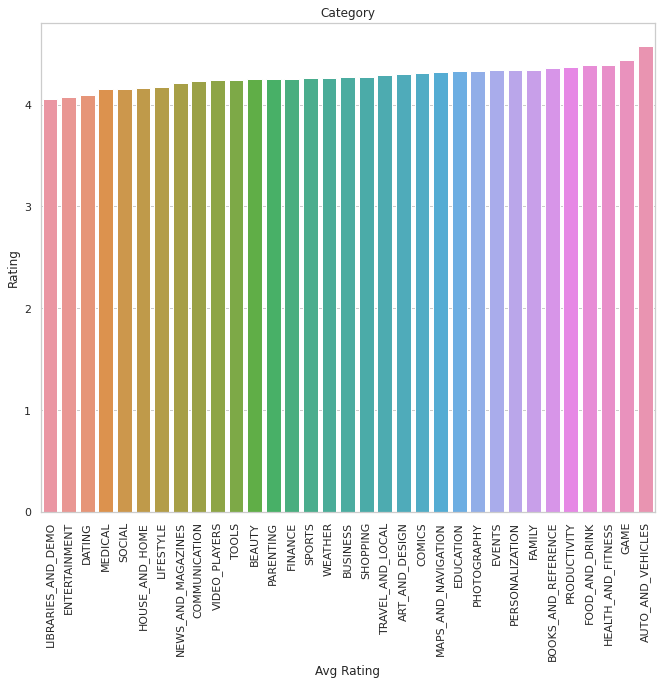

In [100]:
sns.set_style("whitegrid")
plt.figure(figsize=(11,9))
mean_df=mean_df.sort_values(by="Rating",ascending=True)
cat_view2=sns.barplot(x=mean_df.Category, y=mean_df.Rating, data=cat_merged_df)
cat_view2.set(xlabel='Avg Rating',title="Category")
plt.xticks(rotation=90)
plt.show();

In [ ]:
# app_quality_df["Category"]=cleaned_playstore.Category
# app_quality_df

In [ ]:
# category_quality_df=app_quality_df.groupby("Category")["Quality"].sum()
# category_quality_df=category_quality_df.reset_index()
# plt.figure(figsize=(11,9))
# category_quality_view=sns.barplot(x="Quality",y="Category",data=category_quality_df)
# category_quality_view.set(xlabel='Domination metrics',title="Category VS Domination")
# plt.show();

In [81]:
w = cat_merged_df.groupby(cat_merged_df.Category).mean()
w

,App,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
Category,,,,,,,,,,,,,,,,
ART_AND_DESIGN,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382
AUTO_AND_VEHICLES,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289
BEAUTY,338,338,338,338,338,338,338,338,338,338,338,338,338,338,338,338
BOOKS_AND_REFERENCE,651,651,651,651,651,651,651,651,651,651,651,651,651,651,651,651
BUSINESS,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082
COMICS,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
COMMUNICATION,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024
DATING,1715,1715,1715,1715,1715,1715,1715,1715,1715,1715,1715,1715,1715,1715,1715,1715
EDUCATION,847,847,847,847,847,847,847,847,847,847,847,847,847,847,847,847


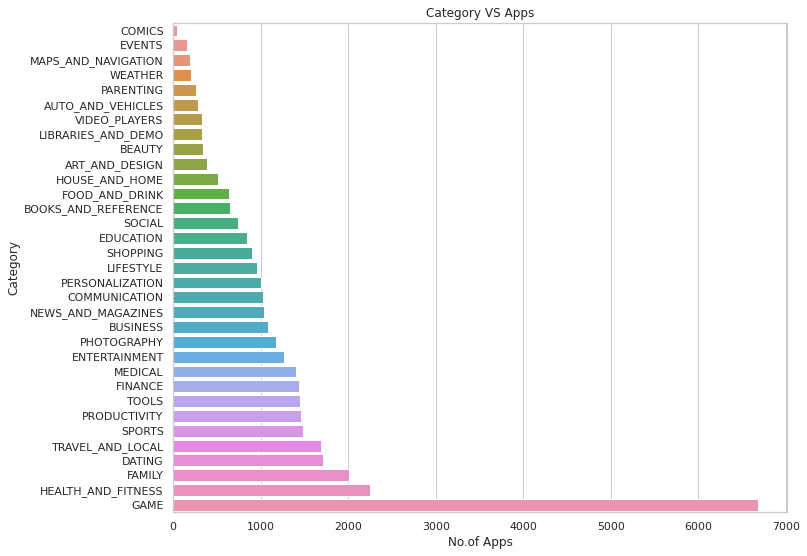

In [73]:
sns.set_style("whitegrid")
plt.figure(figsize=(11,9))
cat_merged_df = cat_merged_df.sort_values(by='Installs',ascending=True)
cat_view=sns.barplot(x=cat_merged_df.Installs, y=cat_merged_df.Category, data=cat_merged_df)
cat_view.set(xlabel='No.of Apps',title="Category VS Apps")
plt.show();

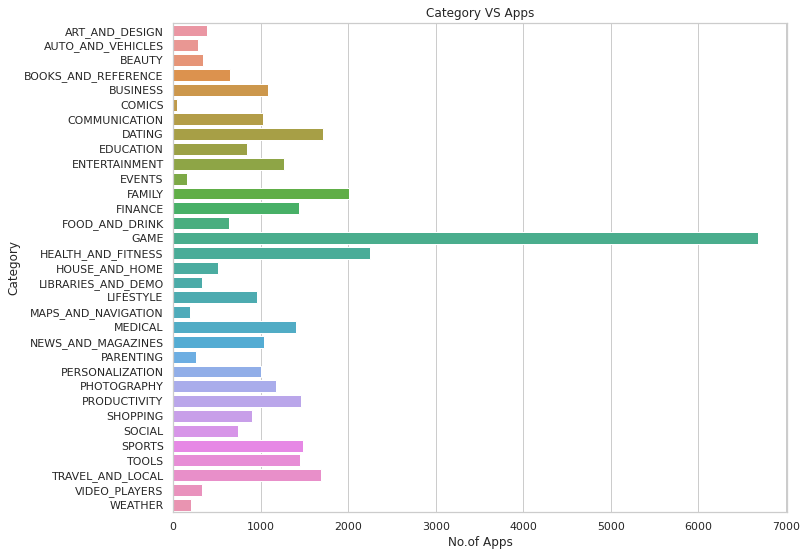

In [82]:
sns.set_style("whitegrid")
plt.figure(figsize=(11,9))
category_view=sns.barplot(x=cat_merged_df.App, y=cat_merged_df.Category, data=cat_merged_df)
category_view.set(xlabel='No.of Apps',title="Category VS Apps")
plt.show();

In [ ]:

cat_merged_df.plot(kind='bar', title='Category VS Apps', ylabel='Category',
                    xlabel='App', figsize=(6, 5))

In [83]:
Category = merged_df.groupby(['Category'])['App'].count().reset_index().rename(columns={'App':'Count of Apps'})
Category = Category.sort_values(by=['Count of Apps'], ascending=False)
Category.set_index('Category', inplace= True)
Category.head()

,Count of Apps
Category,
GAME,6678
HEALTH_AND_FITNESS,2249
FAMILY,2009
DATING,1715
TRAVEL_AND_LOCAL,1692


In [84]:
cat_head= Category.head(10)
top_10_cat = merged_df[merged_df['Category'].isin(cat_head.index)]

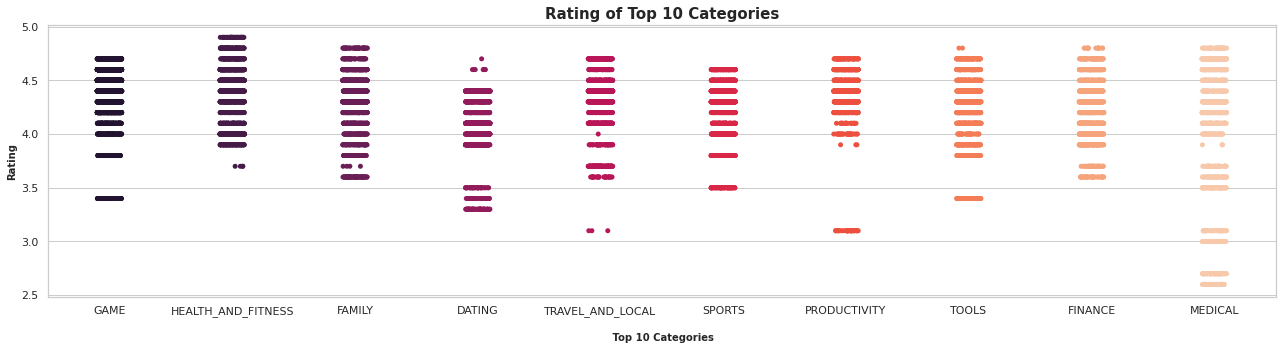

In [85]:
fig2, ax = plt.subplots(figsize=(22,5))
sns.stripplot(x='Category', y='Rating', data=top_10_cat, palette='rocket', order= top_10_cat['Category'].value_counts().index)
plt.xlabel('\n Top 10 Categories', fontsize= 10, fontweight = 'bold')
plt.ylabel('Rating', fontsize= 10, fontweight = 'bold')
plt.title('Rating of Top 10 Categories', fontsize = 15, fontweight = 'bold')
plt.savefig('Rating of Top 10 Categories.png')
plt.show()

In [86]:
paid_apps = merged_df[(merged_df.Type!='Free')]

In [87]:
paid_apps.Installs.unique()

array([ 100000,   50000,    1000, 1000000,   10000])

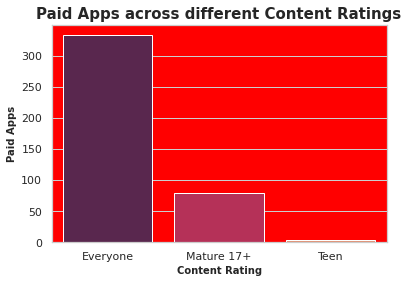

In [88]:
fig3, ax = plt.subplots(figsize = (6,4))
ax.set(facecolor='red')
sns.countplot(x=paid_apps['Content_Rating'], palette = 'rocket',order = paid_apps['Content_Rating'].value_counts().index) 
plt.xlabel('Content Rating', fontsize = 10, fontweight = 'bold')
plt.ylabel('Paid Apps', fontsize = 10, fontweight = 'bold')
plt.title('Paid Apps across different Content Ratings', fontsize = 15, fontweight = 'bold')
plt.savefig('Paid Apps across different Content Ratings.png')
plt.show()